In [1]:
import pandas as pd

df = pd.read_csv('treated_bank_df.csv', sep=';')
df.sample(5)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
16495,28,services,single,high.school,no,no,cellular,jul,wed,73.0,1,0,1.4,93.918,-42.7,4.963,5228.1,no
11228,28,blue-collar,married,high.school,no,no,telephone,jun,thu,419.0,4,0,1.4,94.465,-41.8,4.961,5228.1,no
30627,41,blue-collar,divorced,basic.9y,yes,no,cellular,may,tue,48.0,2,0,-1.8,92.893,-46.2,1.344,5099.1,no
27050,47,management,married,university.degree,no,no,cellular,nov,fri,107.0,2,0,-0.1,93.200,-42.0,4.021,5195.8,no
29845,38,admin.,divorced,basic.9y,yes,no,cellular,apr,mon,39.0,4,0,-1.8,93.075,-47.1,1.405,5099.1,no


### Encoding

'month' and 'day_of_week' will be turned into numbers (1-12 and 1-5)

In [2]:
from time import strptime
df['month'] = [strptime(str(x), '%b').tm_mon for x in df['month']]

In [3]:
days = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}
df['day_of_week'] = df['day_of_week'].map(days)

In [4]:
df.sample(5)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
10164,43,blue-collar,divorced,basic.9y,no,no,telephone,6,4,190.0,2,0,1.4,94.465,-41.8,4.958,5228.1,no
26556,41,blue-collar,married,other,yes,no,cellular,11,4,81.0,2,0,-0.1,93.200,-42.0,4.076,5195.8,no
18986,47,admin.,married,high.school,yes,no,cellular,8,2,145.0,1,0,1.4,93.444,-36.1,4.968,5228.1,no
13765,35,blue-collar,married,basic.9y,no,no,cellular,7,4,180.0,1,0,1.4,93.918,-42.7,4.963,5228.1,yes
35092,45,other,divorced,university.degree,yes,no,cellular,5,5,61.0,2,0,-1.8,92.893,-46.2,1.250,5099.1,no


Turning values into 0 and 1

In [5]:
tf_columns = ['housing', 'loan', 'y']

for column in tf_columns:
    df.loc[df[column]=="yes", column] = 1
    df.loc[df[column]=="no", column] = 0

In [6]:
df.sample(5)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
3178,49,technician,married,high.school,1,0,telephone,5,4,435.0,1,0,1.1,93.994,-36.4,4.860,5191.0,0
7308,30,services,single,high.school,1,0,telephone,5,4,52.0,4,0,1.1,93.994,-36.4,4.860,5191.0,0
17946,32,admin.,married,high.school,0,0,cellular,7,2,193.0,14,0,1.4,93.918,-42.7,4.961,5228.1,0
36889,42,admin.,single,university.degree,0,0,cellular,7,3,268.0,2,0,-2.9,92.469,-33.6,1.029,5076.2,1
37514,25,other,single,university.degree,0,0,cellular,8,4,184.0,1,0,-2.9,92.201,-31.4,0.851,5076.2,1


'marital' and 'contact'

In [7]:
df.loc[df['contact']=='telephone', 'contact'] = 1
df.loc[df['contact']=='cellular', 'contact'] = 0

In [8]:
df.loc[df['marital']=='married', 'marital'] = 0
df.loc[df['marital']=='single', 'marital'] = 1
df.loc[df['marital']=='divorced', 'marital'] = 2

In [9]:
df.sample(5)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
9778,39,blue-collar,0,other,0,0,1,6,3,480.0,3,0,1.4,94.465,-41.8,4.959,5228.1,0
36647,22,services,1,high.school,1,0,0,6,1,147.0,1,0,-2.9,92.963,-40.8,1.260,5076.2,0
37151,30,admin.,1,university.degree,0,0,0,8,2,156.0,1,2,-2.9,92.201,-31.4,0.883,5076.2,0
27380,31,admin.,1,university.degree,1,1,0,11,5,75.0,1,0,-0.1,93.200,-42.0,4.021,5195.8,0
29394,29,other,1,university.degree,1,0,0,4,1,128.0,1,0,-1.8,93.075,-47.1,1.405,5099.1,0


Get dummy variables for columns 'job' and 'education'

In [10]:
categorical_columns = ['job', 'education']
df = pd.get_dummies(data=df, columns=categorical_columns)

display(df.head())

,age,marital,housing,loan,contact,month,day_of_week,duration,campaign,previous,...,job_blue-collar,job_management,job_other,job_services,job_technician,education_basic.9y,education_high.school,education_other,education_professional.course,education_university.degree
0,56,0,0,0,1,5,1,261.0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,57,0,0,0,1,5,1,149.0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,37,0,1,0,1,5,1,226.0,1,0,...,0,0,0,1,0,0,1,0,0,0
3,40,0,0,0,1,5,1,151.0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,56,0,0,1,1,5,1,307.0,1,0,...,0,0,0,1,0,0,1,0,0,0


In [11]:
df.columns

Index(['age', 'marital', 'housing', 'loan', 'contact', 'month', 'day_of_week',
       'duration', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_management', 'job_other', 'job_services',
       'job_technician', 'education_basic.9y', 'education_high.school',
       'education_other', 'education_professional.course',
       'education_university.degree'],
      dtype='object')

In [12]:
print(df.dtypes)

age                                int64
marital                           object
housing                           object
loan                              object
contact                           object
month                              int64
day_of_week                        int64
duration                         float64
campaign                           int64
previous                           int64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
euribor3m                        float64
nr.employed                      float64
y                                 object
job_admin.                         uint8
job_blue-collar                    uint8
job_management                     uint8
job_other                          uint8
job_services                       uint8
job_technician                     uint8
education_basic.9y                 uint8
education_high.school              uint8
education_other 

In [13]:
import numpy as np

df_int = ['marital', 'housing', 'loan', 'contact', 'y']

for column in df_int:
    df[column] = df[column].astype(np.int64, copy=False)

In [14]:
print(df.dtypes)

age                                int64
marital                            int64
housing                            int64
loan                               int64
contact                            int64
month                              int64
day_of_week                        int64
duration                         float64
campaign                           int64
previous                           int64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
euribor3m                        float64
nr.employed                      float64
y                                  int64
job_admin.                         uint8
job_blue-collar                    uint8
job_management                     uint8
job_other                          uint8
job_services                       uint8
job_technician                     uint8
education_basic.9y                 uint8
education_high.school              uint8
education_other 

In [15]:
df.sample(5)

,age,marital,housing,loan,contact,month,day_of_week,duration,campaign,previous,...,job_blue-collar,job_management,job_other,job_services,job_technician,education_basic.9y,education_high.school,education_other,education_professional.course,education_university.degree
25381,37,0,0,0,0,11,2,372.0,1,1,...,0,0,0,0,1,0,0,0,1,0
11931,58,0,1,0,1,6,2,56.0,3,0,...,0,0,0,1,0,0,1,0,0,0
30504,37,1,1,0,0,5,1,23.0,5,0,...,0,0,1,0,0,0,0,0,0,1
40050,30,0,0,1,0,10,3,255.0,1,1,...,0,1,0,0,0,0,0,0,0,1
34024,38,0,1,0,0,5,3,155.0,2,1,...,0,0,1,0,0,1,0,0,0,0


In [16]:
df2 = pd.read_csv('bank-test-encoded-opt4.csv', comment='#')
df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,49,-0.049966,-0.106173,-0.009927,0.000117,-0.027129,-0.001524,0,-0.112177,0.033534,1,-1,0,-0.276437,1.4,94.465,-41.8,4.959,5228.1,0
1,56,-0.496110,-0.117542,-0.451380,0.000117,0.021907,-0.001524,0,-0.598223,0.065041,2,-1,0,-0.276437,1.1,93.994,-36.4,4.860,5191.0,0
2,35,-0.049966,0.254735,-0.009927,0.000117,-0.027129,-0.001524,0,-0.112177,-0.014867,1,-1,0,-0.276437,1.4,94.465,-41.8,4.947,5228.1,0
3,32,-0.496110,-0.117542,-0.451380,0.000117,-0.027129,-0.001524,0,-0.598223,-0.014867,2,-1,0,-0.276437,1.1,93.994,-36.4,4.855,5191.0,0
4,27,0.154788,0.254735,0.232972,0.000117,0.021907,-0.001524,1,-0.112177,0.033534,4,3,2,2.576719,-1.7,94.055,-39.8,0.767,4991.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12352,32,-0.049966,0.254735,-0.009927,0.000117,-0.027129,0.008333,0,-0.210152,0.065041,1,-1,0,-0.276437,1.4,93.918,-42.7,4.968,5228.1,0
12353,46,0.154788,-0.117542,0.232972,0.000117,-0.027129,-0.001524,0,-0.210152,-0.104080,1,-1,0,-0.276437,1.4,93.918,-42.7,4.960,5228.1,0
12354,32,0.154788,0.254735,0.232972,0.000117,-0.027129,-0.001524,1,-0.069575,0.065041,2,-1,0,-0.276437,1.4,93.444,-36.1,4.964,5228.1,0
12355,38,-0.496110,0.254735,0.005154,0.000117,-0.027129,-0.001524,1,-0.598223,-0.014867,2,-1,1,0.280533,-1.8,92.893,-46.2,1.313,5099.1,0


### AI MODEL

#### train and test split

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

y = df['y']
X = df.drop(['y', 'duration'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#### training

In [18]:
dtc_tree = DecisionTreeClassifier(criterion="gini", class_weight='balanced', max_depth=4)
dtc_tree.fit(X_train, y_train)

fit_dtc = dtc_tree.fit(X_train, y_train)

prediction = dtc_tree.predict(X_test)

#### testing and metrics

In [19]:
print(dtc_tree.score(X_test, y_test))

0.7949611631149174


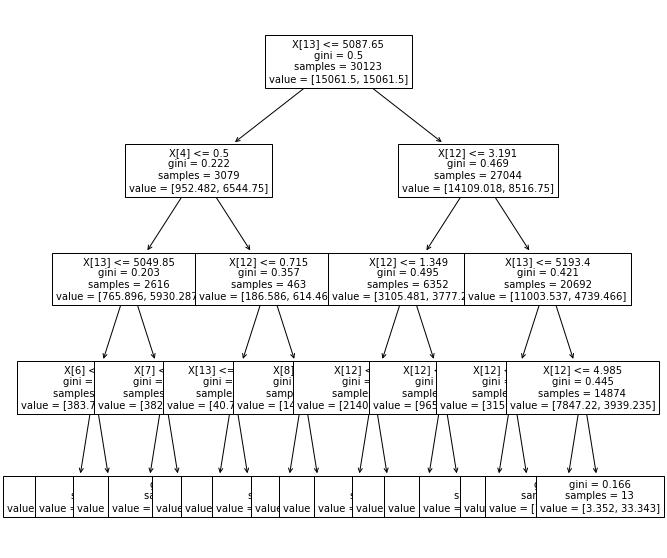

In [20]:
from sklearn import tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(dtc_tree, fontsize=10)
plt.show()

In [21]:
from sklearn import metrics

print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.95      0.81      0.88      9002
           1       0.28      0.63      0.39      1040

    accuracy                           0.79     10042
   macro avg       0.62      0.72      0.63     10042
weighted avg       0.88      0.79      0.83     10042



In [22]:
print('Decision tree: ')
print(metrics.recall_score(y_test, prediction))

Decision tree: 
0.6298076923076923


In [23]:
print(metrics.confusion_matrix(y_test, prediction))
# array ([[TruePos, FalseNeg, FalsePos, TrueNeg]])

[[7328 1674]
 [ 385  655]]


,0
nr.employed,0.744921
euribor3m,0.245461
contact,0.005153
previous,0.002516
day_of_week,0.001185
campaign,0.000763
job_blue-collar,0.000000
education_professional.course,0.000000
education_other,0.000000
education_high.school,0.000000


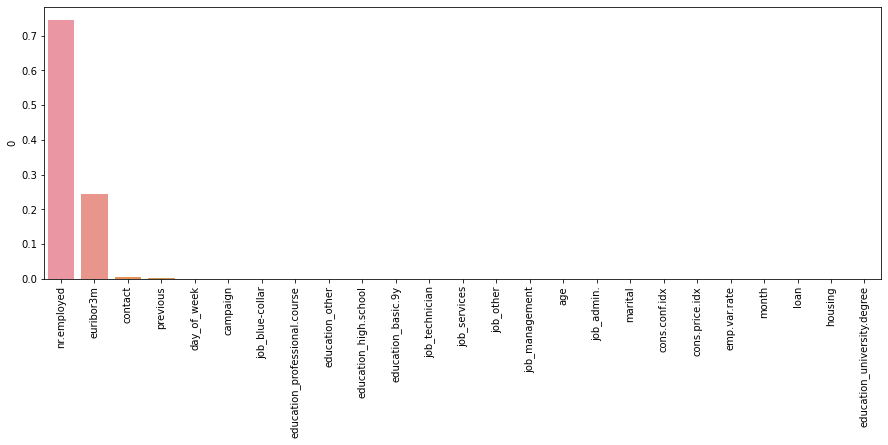

In [24]:
import seaborn as sns

importance_features = pd.DataFrame(dtc_tree.feature_importances_, X_train.columns)
importance_features = importance_features.sort_values(by=0, ascending=False)
display(importance_features)

plt.figure(figsize=(15, 5))
ax = sns.barplot(x=importance_features.index, y=importance_features[0])
ax.tick_params(axis="x", rotation=90)

In [25]:
new_df = df[['nr.employed', 'duration', 'cons.conf.idx', 'euribor3m', 'cons.price.idx', 'previous', 'contact', 'y']]
new_df

,nr.employed,duration,cons.conf.idx,euribor3m,cons.price.idx,previous,contact,y
0,5191.0,261.0,-36.4,4.857,93.994,0,1,0
1,5191.0,149.0,-36.4,4.857,93.994,0,1,0
2,5191.0,226.0,-36.4,4.857,93.994,0,1,0
3,5191.0,151.0,-36.4,4.857,93.994,0,1,0
4,5191.0,307.0,-36.4,4.857,93.994,0,1,0
...,...,...,...,...,...,...,...,...
40160,4963.6,281.0,-50.8,1.028,94.767,0,0,1
40161,4963.6,112.0,-50.8,1.028,94.767,1,0,0
40162,4963.6,383.0,-50.8,1.028,94.767,0,0,0
40163,4963.6,189.0,-50.8,1.028,94.767,0,0,0
